# 1. Poner título a los datasets, eliminar duplicados y guardar en excel

In [72]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from shutil import rmtree

In [73]:
mainpath = "../datasets-tfg"
filename = "conferencias con nombres"
fullpath = os.path.join(mainpath, filename)

lista = os.listdir(fullpath) #Obtenemos la lista de todos los archivos de la carpeta "Conferencias con nombres"

In [81]:
#Vamos a crear la carpeta conferencias v1, donde vamos a guardar todas las conferencias prepreprocesadas, con sus respectivas gráficas
mainpath = "../datasets-tfg"
filename = "conferencias v1"
fullpath = os.path.join(mainpath, filename)

#Comprobamos si la carpeta ya existe
fileExists = os.path.isdir('../datasets-tfg/conferencias v1')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath) #creamos una carpeta, donde posteriormente almacenaremos los csv de las conferencias una vez procesados

In [82]:
#Creamos la carpeta entrenamiento
mainpath = "../datasets-tfg/conferencias v1"
fullpath = os.path.join(mainpath, "entrenamiento")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1"

#Creamos la carpeta test
fullpath = os.path.join(mainpath, "test")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

In [83]:
#Vamos a crear la carpeta csv, donde vamos a guardar todos los csv de las conferencias una vez preprocesadas
mainpath1 = "../datasets-tfg/conferencias v1/entrenamiento"
mainpath2 = "../datasets-tfg/conferencias v1/test"

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath1, "csv completo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/csv completo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath1, "csv cortado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/csv cortado')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas, donde vamos a guardar todas las imagenes de las graficas de las conferencias una vez preprocesadas
fullpath = os.path.join(mainpath1, "graficas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/graficas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)


#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath2, "csv completo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/csv completo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath2, "csv cortado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/csv cortado')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas, donde vamos a guardar todas las imagenes de las graficas de las conferencias una vez preprocesadas
fullpath = os.path.join(mainpath2, "graficas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/graficas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

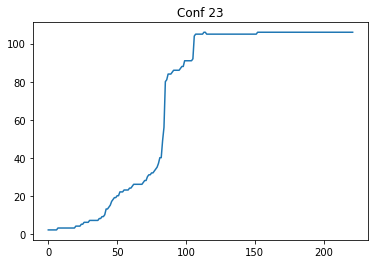

In [84]:
filepath = "../datasets-tfg/conferencias con nombres/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/csv completo/"
filepath2 = "../datasets-tfg/conferencias v1/entrenamiento/csv cortado/"
filepath3 = "../datasets-tfg/conferencias v1/entrenamiento/graficas/"
filepath4 = "../datasets-tfg/conferencias v1/test/csv completo/"
filepath5 = "../datasets-tfg/conferencias v1/test/csv cortado/"
filepath6 = "../datasets-tfg/conferencias v1/test/graficas/"

#Estos son los títulos que queremos para cada columna
conf1_cols=["Fecha", "Enviados", "T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10", "Aceptados", "Porcentaje aceptados","Rechazados",
            "Borrados","Registrados","Sin version final","Desconocido"]

#Obtenemos la lista de todos los archivos de la carpeta "conferencias con nombres"
lista1 = os.listdir("../datasets-tfg/conferencias con nombres")


#Dividimos los datasets en entrenamiento y testeo usando la regla de pareto
data_train, data_test = train_test_split(lista1, test_size=0.2)

for i in range (0,len(data_train)):
    filename = str(data_train[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file, header=None, names=conf1_cols)
    temp_data = temp_data.drop_duplicates()
    temp_data = temp_data.reset_index(drop=True)
    temp_data.to_csv(filepath1 + 'Conf' + str(i) + '.csv', index=False)
    temp_data = temp_data.drop(temp_data[temp_data["Enviados"]>=int(temp_data.tail(1)["Enviados"])].index)
    temp_data.to_csv(filepath2 + 'Conf' + str(i) + '.csv', index=False)
    
    %matplotlib inline
    plt.plot(temp_data["Enviados"])
    plt.title("Conf " + str(i)) 
    
    plt.savefig(filepath3 + "Grafica Conf " + str(i) + ".jpg")
    
    ult_fila = temp_data.tail(1)
    
    
    if i == 0:
        data = ult_fila
    else:
        data = pd.concat([data, ult_fila], axis=0, sort=False)
    
for i in range (0,len(data_test)):
    filename = str(data_test[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file, header=None, names=conf1_cols)
    temp_data = temp_data.drop_duplicates()
    temp_data = temp_data.reset_index(drop=True)
    temp_data.to_csv(filepath4 + 'Conf' + str(i) + '.csv', index=False)
    temp_data = temp_data.drop(temp_data[temp_data["Enviados"]>=int(temp_data.tail(1)["Enviados"])].index)
    temp_data.to_csv(filepath5 + 'Conf' + str(i) + '.csv', index=False)
    
    %matplotlib inline
    plt.plot(temp_data["Enviados"])
    plt.title("Conf " + str(i)) 
    
    plt.savefig(filepath6 + "Grafica Conf " + str(i) + ".jpg")
    
    ult_fila = temp_data.tail(1)
    
    
    if i == 0:
        data = ult_fila
    else:
        data = pd.concat([data, ult_fila], axis=0, sort=False)
    
    

# 2. Recorte automático de curvas por escalones y guardado en fichero

In [85]:
####ENTRENAMIENTO####
#Creamos la carpeta Curvas
mainpath = "../datasets-tfg/conferencias v1/entrenamiento"
fullpath = os.path.join(mainpath, "curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1/entrenamiento/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta picos para division 
fullpath = os.path.join(mainpath, "picos para division")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/picos para division')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta conf dividida 
fullpath = os.path.join(mainpath, "conf dividida")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/conf dividida')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
####TEST####
#Creamos la carpeta Curvas
mainpath = "../datasets-tfg/conferencias v1/test"
fullpath = os.path.join(mainpath, "curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1/test/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/csv curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/graficas curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta picos para division 
fullpath = os.path.join(mainpath, "picos para division")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/picos para division')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta conf dividida 
fullpath = os.path.join(mainpath, "conf dividida")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/conf dividida')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    


In [86]:
from scipy.signal import find_peaks

C:\Users\carmengarut\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\carmengarut\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:633: RuntimeWarning: invalid value encountered in less_equal
  keep &= (pmin <= peak_properties)
C:\Users\carmengarut\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\carmengarut\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:633: RuntimeWarning: invalid value encountered in less_equal
  keep &= (pmin <= peak_properties)
C:\Users\carmengarut\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\carmengarut\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py

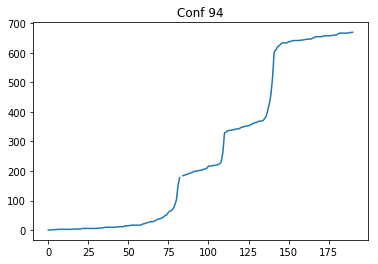

In [87]:
####Curvas entrenamiento#####

filepath = "../datasets-tfg/conferencias v1/entrenamiento/csv completo/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas/"
filepath2 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas/"
filepath3= "../datasets-tfg/conferencias v1/entrenamiento/curvas/picos para division/"
filepath4= "../datasets-tfg/conferencias v1/entrenamiento/curvas/conf dividida/"
filepath5= "../datasets-tfg/conferencias v1/entrenamiento/curvas/"

#declaramos un dataframe vacio
mapa = pd.DataFrame(columns=('NombreCurva', 'Escalon', 'DiasTotales', 'EnviadosTotales'))

lista1 = os.listdir("../datasets-tfg/conferencias v1/entrenamiento/csv completo")

b = len(lista1)
for i in range (0, b): #En el in range no entra el último
    
    filename = "Conf" + str(i) + ".csv"
    file = filepath + filename
    
    #Df completo
    df = pd.read_csv(file)             
    env_lista = df["Enviados"].tolist()    
    env_vect = np.asarray(env_lista)
    m = len(env_vect)
    
    #Df cortado
    df1 = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/csv cortado/" + filename)
    env_lista1 = df1["Enviados"].tolist()    
    env_vect1 = np.asarray(env_lista1)
    h = len(env_vect1)
    
    #Calculamos la derivada en cada punto del df completo
    deriv = env_vect[1]-env_vect[0]   
    deriv = [deriv]
    
    for j in range (2, m):
        d = env_vect[j]-env_vect[j-1]
        deriv.append(d)
    
    #Pasamos la derivada a de formato lista a vector    
    deriv1 = np.asarray(deriv)    
    
    #Suavizamos la derivada haciendo la media
    deriv2 = (deriv1[0]+deriv1[1]+deriv1[2]+ deriv1[3]+deriv1[4]+ deriv1[5]+deriv1[6])/5
    deriv2 = [deriv2]

    for k in range (4, m-4):
        d = (deriv1[k-3]+deriv1[k-2]+deriv1[k-1]+deriv1[k]+deriv1[k+1]+deriv1[k+2]+deriv1[k+3])/5
        deriv2.append(d)
    
    deriv3 = np.asarray(deriv2)
    
    n = len(deriv3)
    #Suavizamos la derivada otra vez haciendo la media
    deriv4 = (deriv3[0]+deriv3[1]+deriv3[2]+ deriv3[3]+deriv3[4]+ deriv3[5]+deriv3[6])/5
    deriv4 = [deriv4]

    for l in range (4, n-3):
        d = (deriv3[l-3]+deriv3[l-2]+deriv3[l-1]+deriv3[l]+deriv3[l+1]+deriv3[l+2]+deriv3[l+3])/5
        deriv4.append(d)
    
    deriv5 = np.asarray(deriv4)
    
    #Hacemos lo mismo para el df cortado 
    #Calculamos la derivada en cada punto del df cortado
    deriv_cortada = env_vect1[1]-env_vect1[0]   
    deriv_cortada = [deriv_cortada]
    
    for j in range (2, h):
        d = env_vect1[j]-env_vect1[j-1]
        deriv_cortada.append(d)

    #Pasamos la derivada a de formato lista a vector    
    deriv1_cortada = np.asarray(deriv_cortada)    
    
    #Suavizamos la derivada haciendo la media
    deriv2_cortada = (deriv1_cortada[0]+deriv1_cortada[1]+deriv1_cortada[2]+ deriv1_cortada[3]+deriv1_cortada[4]+ deriv1_cortada[5]+deriv1_cortada[6])/5
    deriv2_cortada = [deriv2_cortada]

    for k in range (4, h-4):
        d = (deriv1_cortada[k-3]+deriv1_cortada[k-2]+deriv1_cortada[k-1]+deriv1_cortada[k]+deriv1_cortada[k+1]+deriv1_cortada[k+2]+deriv1_cortada[k+3])/5
        deriv2_cortada.append(d)
    
    deriv3_cortada = np.asarray(deriv2_cortada)
    
    r = len(deriv3_cortada)
    #Suavizamos la derivada otra vez haciendo la media
    deriv4_cortada = (deriv3_cortada[0]+deriv3_cortada[1]+deriv3_cortada[2]+ deriv3_cortada[3]+deriv3_cortada[4]+ deriv3_cortada[5]+deriv3_cortada[6])/5
    deriv4_cortada = [deriv4_cortada]

    for l in range (4, r-3):
        d = (deriv3_cortada[l-3]+deriv3_cortada[l-2]+deriv3_cortada[l-1]+deriv3_cortada[l]+deriv3_cortada[l+1]+deriv3_cortada[l+2]+deriv3_cortada[l+3])/5
        deriv4_cortada.append(d)
    
    deriv5_cortada = np.asarray(deriv4_cortada)
        
    p = np.amax(deriv5) / 6
    
    #Busco los máximos de la derivada
    n = len(deriv5)
    x = np.array(range(0,n,1))
    peaks, _ = find_peaks(deriv5, height=p)
    
    %matplotlib inline
    r = len(deriv5_cortada)
    x_cortada = np.array(range(0,r,1))
    plt.plot(x_cortada, deriv5_cortada)
    plt.plot(peaks, deriv5[peaks], "x")
    plt.title('Grafica Conf' + str(i)) 
    plt.savefig(filepath3 + "Conf " + str(i) + '_peaks' + ".jpg")
    
    pcorte=peaks
    for c in range (0, len(peaks)):
        pcorte[c]=pcorte[c]+9
    
    %matplotlib inline
    plt.plot(env_vect1)
    plt.plot(pcorte, env_vect[pcorte], "x")
    plt.title("Conf " + str(i)) 
    plt.savefig(filepath4 + "Conf " + str(i) + '_division' + ".jpg")
    
    #Dividimos la curva en escalones
    n = len(peaks)
    error = 0

    for l in range (0,n):
        if n==1:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        elif l==0:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
        
        elif l==n-1:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        else:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
mapa.to_csv(filepath5 + 'Mapa.csv', index=False)

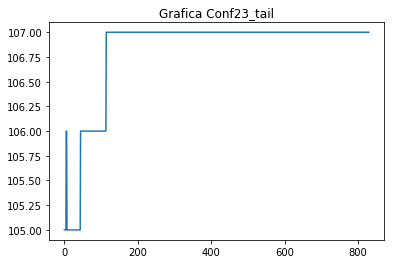

In [88]:
####Curvas test#####

filepath = "../datasets-tfg/conferencias v1/test/csv completo/"
filepath1 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas/"
filepath2 = "../datasets-tfg/conferencias v1/test/curvas/graficas curvas/"
filepath3= "../datasets-tfg/conferencias v1/test/curvas/picos para division/"
filepath4= "../datasets-tfg/conferencias v1/test/curvas/conf dividida/"
filepath5= "../datasets-tfg/conferencias v1/test/curvas/"


#declaramos un dataframe vacio
mapa = pd.DataFrame(columns=('NombreCurva', 'Escalon', 'DiasTotales', 'EnviadosTotales'))
mapa2 = pd.DataFrame(columns=('Nombre conferencia', 'Numero escalones', 'Numero Enviados'))

lista1 = os.listdir("../datasets-tfg/conferencias v1/test/csv completo")

b = len(lista1)
for i in range (0, b): #En el in range no entra el último
    
    filename = "Conf" + str(i) + ".csv"
    file = filepath + filename
    
    #Df completo
    df = pd.read_csv(file)             
    env_lista = df["Enviados"].tolist()    
    env_vect = np.asarray(env_lista)
    m = len(env_vect)
    
    #Df cortado
    df1 = pd.read_csv("../datasets-tfg/conferencias v1/test/csv cortado/" + filename)
    env_lista1 = df1["Enviados"].tolist()    
    env_vect1 = np.asarray(env_lista1)
    h = len(env_vect1)
    
    #Calculamos la derivada en cada punto del df completo
    deriv = env_vect[1]-env_vect[0]   
    deriv = [deriv]
    
    for j in range (2, m):
        d = env_vect[j]-env_vect[j-1]
        deriv.append(d)
    
    #Pasamos la derivada a de formato lista a vector    
    deriv1 = np.asarray(deriv)    
    
    #Suavizamos la derivada haciendo la media
    deriv2 = (deriv1[0]+deriv1[1]+deriv1[2]+ deriv1[3]+deriv1[4]+ deriv1[5]+deriv1[6])/5
    deriv2 = [deriv2]

    for k in range (4, m-4):
        d = (deriv1[k-3]+deriv1[k-2]+deriv1[k-1]+deriv1[k]+deriv1[k+1]+deriv1[k+2]+deriv1[k+3])/5
        deriv2.append(d)
    
    deriv3 = np.asarray(deriv2)
    
    n = len(deriv3)
    #Suavizamos la derivada otra vez haciendo la media
    deriv4 = (deriv3[0]+deriv3[1]+deriv3[2]+ deriv3[3]+deriv3[4]+ deriv3[5]+deriv3[6])/5
    deriv4 = [deriv4]

    for l in range (4, n-3):
        d = (deriv3[l-3]+deriv3[l-2]+deriv3[l-1]+deriv3[l]+deriv3[l+1]+deriv3[l+2]+deriv3[l+3])/5
        deriv4.append(d)
    
    deriv5 = np.asarray(deriv4)
    
    #Hacemos lo mismo para el df cortado 
    #Calculamos la derivada en cada punto del df cortado
    deriv_cortada = env_vect1[1]-env_vect1[0]   
    deriv_cortada = [deriv_cortada]
    
    for j in range (2, h):
        d = env_vect1[j]-env_vect1[j-1]
        deriv_cortada.append(d)

    #Pasamos la derivada a de formato lista a vector    
    deriv1_cortada = np.asarray(deriv_cortada)    
    
    #Suavizamos la derivada haciendo la media
    deriv2_cortada = (deriv1_cortada[0]+deriv1_cortada[1]+deriv1_cortada[2]+ deriv1_cortada[3]+deriv1_cortada[4]+ deriv1_cortada[5]+deriv1_cortada[6])/5
    deriv2_cortada = [deriv2_cortada]

    for k in range (4, h-4):
        d = (deriv1_cortada[k-3]+deriv1_cortada[k-2]+deriv1_cortada[k-1]+deriv1_cortada[k]+deriv1_cortada[k+1]+deriv1_cortada[k+2]+deriv1_cortada[k+3])/5
        deriv2_cortada.append(d)
    
    deriv3_cortada = np.asarray(deriv2_cortada)
    
    r = len(deriv3_cortada)
    #Suavizamos la derivada otra vez haciendo la media
    deriv4_cortada = (deriv3_cortada[0]+deriv3_cortada[1]+deriv3_cortada[2]+ deriv3_cortada[3]+deriv3_cortada[4]+ deriv3_cortada[5]+deriv3_cortada[6])/5
    deriv4_cortada = [deriv4_cortada]

    for l in range (4, r-3):
        d = (deriv3_cortada[l-3]+deriv3_cortada[l-2]+deriv3_cortada[l-1]+deriv3_cortada[l]+deriv3_cortada[l+1]+deriv3_cortada[l+2]+deriv3_cortada[l+3])/5
        deriv4_cortada.append(d)
    
    deriv5_cortada = np.asarray(deriv4_cortada)
        
    p = np.amax(deriv5) / 6
    
    #Busco los máximos de la derivada
    n = len(deriv5)
    x = np.array(range(0,n,1))
    peaks, _ = find_peaks(deriv5, height=p)
    
    %matplotlib inline
    r = len(deriv5_cortada)
    x_cortada = np.array(range(0,r,1))
    plt.plot(x_cortada, deriv5_cortada)
    plt.plot(peaks, deriv5[peaks], "x")
    plt.title('Grafica Conf' + str(i)) 
    plt.savefig(filepath3 + "Conf " + str(i) + '_peaks' + ".jpg")
    
    pcorte=peaks
    for c in range (0, len(peaks)):
        pcorte[c]=pcorte[c]+9
    
    %matplotlib inline
    plt.plot(env_vect1)
    plt.plot(pcorte, env_vect[pcorte], "x")
    plt.title("Conf " + str(i)) 
    plt.savefig(filepath4 + "Conf " + str(i) + '_division' + ".jpg")
    
    #Dividimos la curva en escalones
    n = len(peaks)
    error = 0

    for l in range (0,n):
        if n==1:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        elif l==0:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
        
        elif l==n-1:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        else:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
    mapa2.loc[len(mapa2)] = ['Conf' + str(i), n+1, df["Enviados"][len(df)-1]]
            
mapa.to_csv(filepath5 + 'Mapa.csv', index=False)
mapa2.to_csv(filepath5 + 'Mapa conferencias.csv', index=False)

# 3. Escalado de las curvas

In [89]:
### Curvas entrenamiento ###

mainpath = "../datasets-tfg/conferencias v1/entrenamiento/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)


### Curvas test ###

mainpath = "../datasets-tfg/conferencias v1/test/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas (eje x)")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas (eje x)")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas (eje x)')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

C:\Users\carmengarut\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in longlong_scalars


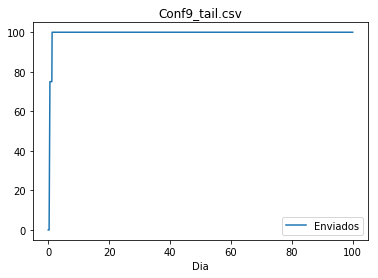

In [90]:
### Curvas entrenamiento ####

filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"

#Obtenemos la lista de todos los archivos de la carpeta "csv curvas"
lista1 = os.listdir("../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas")

n = len(lista1) #número de archivos en la carpeta

for i in range (0, n): #En el in range no entra el último
    filename = str(lista1[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file)
    size = temp_data.shape
    rows = size[0]
    
    Enviados = temp_data["Enviados"]
    Dia = list(range(0, rows))
    
    FactorX = 100/(rows-1)
    Offset = 0-temp_data["Enviados"][0]
    FactorY = 100/(temp_data["Enviados"][rows-1]+Offset)
    
    EnviadosEsc = (Enviados+Offset)*FactorY
    Diav = np.asarray(Dia)
    DiaEsc = Diav*FactorX
    
    data = pd.DataFrame(columns=('Dia', 'Enviados'))
    for j in range (0, rows):
        data.loc[len(data)]=[DiaEsc[j], EnviadosEsc[j]] 
    
    data.to_csv(filepath1 + str(lista1[i]), index=False)
    
    %matplotlib inline
    data.plot(x="Dia", y="Enviados")
    plt.title(str(lista1[i])) 
    
    filepath2 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/"
    plt.savefig(filepath2 + str(lista1[i]) + ".jpg")


C:\Users\carmengarut\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in longlong_scalars


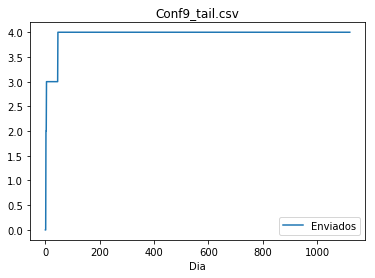

In [91]:
### Curvas test ####

filepath = "../datasets-tfg/conferencias v1/test/curvas/csv curvas/"
filepath1 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas/"
filepath2 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/"
filepath3 = "../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas/"
filepath4 = "../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas (eje x)/"

#Obtenemos la lista de todos los archivos de la carpeta "csv curvas"
lista1 = os.listdir("../datasets-tfg/conferencias v1/test/curvas/csv curvas")

n = len(lista1) #número de archivos en la carpeta

for i in range (0, n): #En el in range no entra el último
    filename = str(lista1[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file)
    size = temp_data.shape
    rows = size[0]
    
    Enviados = temp_data["Enviados"]
    Dia = list(range(0, rows))
    
    FactorX = 100/(rows-1)
    Offset = 0-temp_data["Enviados"][0]
    FactorY = 100/(temp_data["Enviados"][rows-1]+Offset)
    
    EnviadosOffset = Enviados+Offset
    EnviadosEsc = (Enviados+Offset)*FactorY
    Diav = np.asarray(Dia)
    DiaEsc = Diav*FactorX
    
    data = pd.DataFrame(columns=('Dia', 'Enviados'))
    data1 = pd.DataFrame(columns=('Dia', 'Enviados'))
    for j in range (0, rows):
        data.loc[len(data)]=[DiaEsc[j], EnviadosEsc[j]] 
        data1.loc[len(data)]=[Dia[j], EnviadosOffset[j]] 
    data.to_csv(filepath1 + str(lista1[i]), index=False)
    data1.to_csv(filepath2 + str(lista1[i]), index=False)
    
    %matplotlib inline
    data.plot(x="Dia", y="Enviados")
    plt.title(str(lista1[i])) 
    plt.savefig(filepath3 + str(lista1[i]) + ".jpg")
    
    %matplotlib inline
    data1.plot(x="Dia", y="Enviados")
    plt.title(str(lista1[i])) 
    plt.savefig(filepath4 + str(lista1[i]) + ".jpg")


# 4. Modelización de las curvas

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)


In [94]:
mainpath = "../datasets-tfg/conferencias v1"
mainpath1 = "../datasets-tfg/conferencias v1/resultado"

#Creamos la carpeta graficas resultado
fullpath = os.path.join(mainpath, "resultado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas modelos curvas
fullpath = os.path.join(mainpath1, "graficas modelos")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/graficas modelos')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,Mse,Rmse,R2
0,0,1,1,72,23,"0 49 Name: EnviadosTotales, dtype: int64",77.654604,8.812185,-0.346004
1,0,1,2,218,23,"0 195 Name: EnviadosTotales, dtype: int64",1195.039513,34.569344,-19.713874
2,0,1,3,190,23,"0 167 Name: EnviadosTotales, dtype: int64",832.693203,28.856424,-13.433249
3,0,1,4,128,23,"0 105 Name: EnviadosTotales, dtype: int64",280.396559,16.745046,-3.860173
4,0,2,1,8,17,"0 -9 Name: EnviadosTotales, dtype: int64",51.652854,7.186992,0.035608
5,0,2,2,8,17,"0 -9 Name: EnviadosTotales, dtype: int64",51.652854,7.186992,0.035608
6,0,2,3,8,17,"0 -9 Name: EnviadosTotales, dtype: int64",51.652854,7.186992,0.035608
7,0,2,4,30,17,"0 13 Name: EnviadosTotales, dtype: int64",16.733621,4.090675,0.687572
8,1,1,1,8,14,"0 -6 Name: EnviadosTotales, dtype: int64",10.656874,3.264487,0.180315
9,1,1,2,25,14,"0 11 Name: EnviadosTotales, dtype: int64",1.137658,1.066611,0.912496


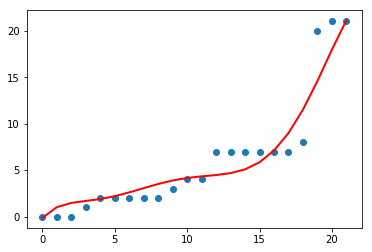

In [107]:
from statistics import *
#Declaramos los paths que vamos a usar
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"
filepath2= "../datasets-tfg/conferencias v1/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/resultado/"
mainpath = "../datasets-tfg/conferencias v1/resultado"

mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")
mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa.csv")
result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'Mse','Rmse','R2'))

d = len(mapa_conf)
for j in range (0, d):
    
    #Creamos una carpeta donde vamos a almacenar las gráficas de cada test
    #fullpath = os.path.join(mainpath, "Prueba Conf " + str(j))
    #fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/Prueba Conf ' + str(j))
    #if fileExists == True:
    #    rmtree(fullpath)
    #os.makedirs(fullpath)

    
    for k in range (1, mapa_conf["Numero escalones"][j]):
        
        #Creamos una carpeta donde vamos a almacenar las gráficas de cada escalon
        #fullpath = os.path.join(mainpath, "Prueba Conf " + str(j) + "/Escalon " + str(k))
        #fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/Prueba Conf ' + str(j) + "/Escalon " + str(k))
        #if fileExists == True:
        #    rmtree(fullpath)
        #os.makedirs(fullpath)
        
        prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_C" + str(k) + ".csv")
        ndias=len(prueba)
        
        #Estos datos los usaremos para comprobar el modelo elegido
        x_test1= np.arange(0,ndias,1)
        x_test1 = x_test1[:, np.newaxis]
        y_test1 = prueba["Enviados"]
            
        mapa = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")
        n=len(mapa)
                      
        mse=[]
        rmse=[]
        coefR2=[]  
        i=0
        x=0
        y=0
        
        while i<n:
            
            if mapa["Escalon"][i]==k:
                filename = mapa["NombreCurva"][i] + '.csv'
                file = os.path.join(filepath, filename)

                temp_data = pd.read_csv(file)
            
            #   if ["Escalon"][i]==k:
            #       if i==0:
            #           y = temp_data["Enviados"]
            #           x = temp_data["Dia"]
            #       else: 
            #           y = np.append(y,temp_data["Enviados"])
            #           x = np.append(x,temp_data["Dia"])
            
                if i==0:
                    y = temp_data["Enviados"]
                    x = temp_data["Dia"]
                else: 
                    y = np.append(y,temp_data["Enviados"])
                    x = np.append(x,temp_data["Dia"])
            
            i=i+1
        
        x=x/100*ndias
        x = x[:, np.newaxis]
        grado=6
        
        for l in range (1, 5):
            
            #Estos datos los usaremos para elegir el modelo que mejor se ajuste
            x_test= np.arange(0,round(l*ndias/5),1)
            x_test = x_test[:, np.newaxis]
            drop= np.arange(round(l*ndias/5),ndias,1)
            prueba1 = prueba.drop(drop)
            y_test = prueba1["Enviados"]
            
            matrizR2 = np.zeros(shape=(n,6))
            R2=[]
        
            h=8
            while h<300:
                y1=y/100*h
                m=len(y)

                #Se define el grado del polinomio
                poli_reg = PolynomialFeatures(degree =6)
            
                #Se transforma las características existentes en características de mayor grado
                x_train_poli = poli_reg.fit_transform(x)
                x_test_poli = poli_reg.fit_transform(x_test)
            
                #Defino el algoritmo a utilizar
                pr = LinearRegression()
            
                #Entreno el modelo
                pr.fit(x_train_poli, y1)
            
                #Realizo una predicción
                y_pred_pr = pr.predict(x_test_poli)
            
                #%matplotlib inline
                #plt.scatter(x_test1, y_test1)
                #plt.plot(x_test, y_pred_pr, color='red', linewidth=2)
                #plt.savefig(filepath3 + 'Prueba Conf ' + str(j) + "/Escalon " + str(k) + "/Escala " + str(h))
         
                R2.append(pr.score(x_test_poli, y_test))
            #R2_prov=pr.score(x_test_poli, y_test)
    
            #if R2_prov>=0:
                #R2.append(pr.score(x_test_poli, y_test))
            
                h=h+1
        
            R2p=0
            escala=0
            for a in range (0, len(R2)):
                if R2[a]>R2p:
                    R2p=R2[a]
                    escala=a+8
        
            if escala==0:
                R2p=abs(R2[0])
                escala=8
                for a in range (0, len(R2)):
                    if abs(R2[a])<R2p:
                        R2p=abs(R2[a])
                        escala=a+8
                
        #x_test=np.arange(0,ndias,1)
        #x_test = x_test[:, np.newaxis]
        
            y1=y/100*escala
        
            #Se define el grado del polinomio
            poli_reg = PolynomialFeatures(degree =grado)
        
            #Se transforma las características existentes en características de mayor grado
            x_train_poli = poli_reg.fit_transform(x)
            x_test_poli = poli_reg.fit_transform(x_test1)
        
            #Defino el algoritmo a utilizar
            pr = LinearRegression()
        
            #Entreno el modelo
            pr.fit(x_train_poli, y1)
        
            #Realizo una predicción
            y_pred_pr = pr.predict(x_test_poli)
        
            c0 = pr.intercept_
            c1 = pr.coef_[1]
        
            if grado>1:
                c2 = pr.coef_[2]
                if grado>2:
                    c3 = pr.coef_[3]
                    if grado>3:
                        c4 = pr.coef_[4]
                        if grado>4:
                            c5 = pr.coef_[5]
                            if grado>5:
                                c6 = pr.coef_[6]
                                
            # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
            mse.append(mean_squared_error(y_true = y_test1, y_pred = y_pred_pr))         

            # La raíz cuadrada del MSE es el RMSE
            rmse.append(np.sqrt(mse[l-1]))
                      
            coefR2.append(pr.score(x_test_poli, y_test1))                      
            mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_C" + str(k)]
            mapa_curv1 = mapa_curv1.reset_index(drop=True)
            result.loc[len(result)]=[str(j), str(k), str(l), escala, mapa_curv1["EnviadosTotales"][0], escala-mapa_curv1["EnviadosTotales"][0], mse[l-1], rmse[l-1], coefR2[l-1]]   
            
            %matplotlib inline
            plt.scatter(x_test1, y_test1)
            plt.plot(x_test1, y_pred_pr, color='red', linewidth=2)
            plt.savefig(filepath3 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala " + str(escala)  )

        

result

In [44]:
result2 = pd.DataFrame(columns=('Conferencia','x/5','Media Mse','Media Rmse'))
for i in range (0,d):
    mse_medio = []
    rmse_medio = []
    for j in range (1,5):
        result1 = result[result.Conferencia == str(i) ]
        result1 = result1[result1.LongTramo == str(j)]
        mse_medio.append(result1["Mse"].mean())
        rmse_medio.append(result1["Rmse"].mean())
        result2.loc[len(result2)]=[str(i), str(j), mse_medio[j-1], rmse_medio[j-1]]  
result2

,Conferencia,x/5,Media Mse,Media Rmse
0,0,1,57.200989,6.817558
1,0,2,92.778101,8.106426
2,0,3,102.950432,8.294611
3,0,4,52.685859,5.984544
4,1,1,1234.686518,33.923915
5,1,2,538.180667,22.756599
6,1,3,259.897353,15.597691
7,1,4,157.729597,12.434687
8,2,1,67.125126,8.068829
9,2,2,67.125126,8.068829
